# Testing SMGA strategies

## Importing modules

In [1]:
import sys
sys.path.append('../src')

from data_loader import load_sector_data, get_seasonal_returns, calculate_sector_ratio
# from returns_calculator import (
#     calculate_annual_returns_from_monthly,
#     calculate_seasonal_returns
# )
# from sharpe_analysis import (
#     calculate_sharpe_ratio,
#     calculate_sharpe_ratio_by_season
#)
from timeseries_analysis import *
from stats_analysis import calculate_statistics, seasonal_ttest
from visualization import plot_seasonal_comparison, plot_monthly_averages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

print("✓ Setup complete!")

✓ Setup complete!


## load the data

In [2]:
# Load the data
file_path = '../data/Seasonal S&P Data as of 11.13.2025 - Abhi.xlsx'

df_sp500 = load_sector_data(file_path, 'S&P500')
df_tbills = load_sector_data(file_path, 'TBills')

print("SP 500 data:")
print(f"  Years: {df_sp500.index.min()} - {df_sp500.index.max()}")
print(f"  Shape: {df_sp500.shape}")

print("\nTbills data:")
print(f"  Years: {df_tbills.index.min()} - {df_tbills.index.max()}")
print(f"  Shape: {df_tbills.shape}")

print("\nFirst few rows of S&P500:")
print(df_sp500.head())

SP 500 data:
  Years: 1970 - 2025
  Shape: (56, 12)

Tbills data:
  Years: 2001 - 2025
  Shape: (25, 12)

First few rows of S&P500:
        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug     Sep    Oct  \
Year                                                                          
1970 -7.647  5.269  0.145 -9.048 -6.097 -5.003  7.329  4.446   3.300 -1.140   
1971  4.048  0.907  3.680  3.629 -4.156  0.070 -4.132  3.610  -0.697 -4.179   
1972  1.812  2.165  0.591  0.438  1.728 -2.182  0.233  3.445  -0.486  0.932   
1973 -1.711 -3.749 -0.143 -4.080 -1.888 -0.657  3.798 -3.668   4.010 -0.129   
1974 -1.005 -0.362 -2.328 -3.905 -3.355 -1.467 -7.779 -9.028 -11.933 16.305   

         Nov    Dec  
Year                 
1970   4.745  5.677  
1971  -0.255  8.618  
1972   4.562  1.183  
1973 -11.386  1.657  
1974  -5.318 -2.015  


## Calculate S&P 500 excess returns 

In [3]:
sp500_excess = calculate_sp500_returns_ts(df_sp500, df_tbills)
print(f"S&P 500 excess returns calculated")
print(f"Total observations: {len(sp500_excess)}")
print(f"Date range: {sp500_excess.index.min()} to {sp500_excess.index.max()}")
print("\nFirst 10 observations:")
sp500_excess.head(10)

S&P 500 excess returns calculated
Total observations: 291
Date range: 2001-08-01 00:00:00 to 2025-10-01 00:00:00

First 10 observations:


2001-08-01   -6.544
2001-09-01   -8.286
2001-10-01    1.707
2001-11-01    7.423
2001-12-01    0.671
2002-01-01   -1.641
2002-02-01   -2.164
2002-03-01    3.586
2002-04-01   -6.228
2002-05-01   -0.995
dtype: object

## Calculate SMGA returns strategy

In [4]:
smga_excess = calculate_smga_returns_ts(df_sp500, df_tbills)

print(f"SMGA excess returns calculated")
print(f"Total observations: {len(smga_excess)}")
print(f"Date range: {smga_excess.index.min()} to {smga_excess.index.max()}")
print("\nFirst 15 observations (showing seasonal pattern):")
smga_excess.head(15)

SMGA excess returns calculated
Total observations: 291
Date range: 2001-08-01 00:00:00 to 2025-10-01 00:00:00

First 15 observations (showing seasonal pattern):


2001-08-01    0.000
2001-09-01    0.000
2001-10-01    0.000
2001-11-01    7.423
2001-12-01    0.671
2002-01-01   -1.641
2002-02-01   -2.164
2002-03-01    3.586
2002-04-01   -6.228
2002-05-01    0.000
2002-06-01    0.000
2002-07-01    0.000
2002-08-01    0.000
2002-09-01    0.000
2002-10-01    0.000
dtype: float64

## sample_year = 2005  # Change this to any year you want to inspect

In [5]:
sample_year = 2005
sample_comparison = pd.DataFrame({
    'Date': sp500_excess[sp500_excess.index.year == sample_year].index,
    'Month': sp500_excess[sp500_excess.index.year == sample_year].index.month,
    'SP500_Excess': sp500_excess[sp500_excess.index.year == sample_year].values,
    'SMGA_Excess': smga_excess[smga_excess.index.year == sample_year].values
})

In [6]:
print(f"Comparing S&P 500 vs SMGA for year {sample_year}:")
print("Notice: SMGA = 0 for May-Oct (months 5-10), equals S&P 500 for Nov-Apr")
sample_comparison

Comparing S&P 500 vs SMGA for year 2005:
Notice: SMGA = 0 for May-Oct (months 5-10), equals S&P 500 for Nov-Apr


,Date,Month,SP500_Excess,SMGA_Excess
0,2005-01-01,1,-2.625,-2.625
1,2005-02-01,2,1.785,1.785
2,2005-03-01,3,-2.024,-2.024
3,2005-04-01,4,-2.123,-2.123
4,2005-05-01,5,2.883,0.000
5,2005-06-01,6,-0.131,0.000
6,2005-07-01,7,3.473,0.000
7,2005-08-01,8,-1.251,0.000
8,2005-09-01,9,0.569,0.000
9,2005-10-01,10,-1.906,0.000


## Calculate statistics for full period

In [7]:
stats_sp500_full = calculate_statistics_ts(sp500_excess, 'S&P 500')
stats_smga_full = calculate_statistics_ts(smga_excess, 'SMGA')

summary_full = pd.DataFrame([stats_sp500_full, stats_smga_full]).set_index('Strategy')

print("="*80)
print("FULL PERIOD STATISTICS")
print("="*80)
print(summary_full)

print("\n" + "="*80)
print("COMPARISON TO PAPER (Table 2, 1993-2023)")
print("="*80)
print("Paper's S&P 500: Mean=0.90%, Std=4.32%, Sharpe=0.21")
print("Paper's SMGA:    Mean=0.90%, Std=3.52%, Sharpe=0.26")


FULL PERIOD STATISTICS
          Mean (%)  Median (%)  Std Dev (%)  Sharpe  Sortino    N    Start  \
Strategy                                                                     
S&P 500      0.638       1.134        4.326   0.511    0.680  291  2001-08   
SMGA         0.448       0.000        2.996   0.518    0.509  291  2001-08   

              End  
Strategy           
S&P 500   2025-10  
SMGA      2025-10  

COMPARISON TO PAPER (Table 2, 1993-2023)
Paper's S&P 500: Mean=0.90%, Std=4.32%, Sharpe=0.21
Paper's SMGA:    Mean=0.90%, Std=3.52%, Sharpe=0.26


In [8]:
sp500_p1 = filter_period(sp500_excess, start_year=1993, end_year=2007)
smga_p1 = filter_period(smga_excess, start_year=1993, end_year=2007)

print(f"Period 1 filtered: {len(sp500_p1)} observations")
print(f"Date range: {sp500_p1.index.min()} to {sp500_p1.index.max()}")

stats_sp500_p1 = calculate_statistics_ts(sp500_p1, 'S&P 500')
stats_smga_p1 = calculate_statistics_ts(smga_p1, 'SMGA')

summary_p1 = pd.DataFrame([stats_sp500_p1, stats_smga_p1]).set_index('Strategy')

print("="*80)
print("PERIOD 1: 1993-2007 STATISTICS")
print("="*80)
print(summary_p1)

print("\n" + "="*80)
print("COMPARISON TO PAPER (Table 2, 1993-2007)")
print("="*80)
print("Paper's S&P 500: Mean=0.91%, Std=3.92%, Sharpe=0.23")
print("Paper's SMGA:    Mean=0.99%, Std=2.91%, Sharpe=0.34")

sp500_p2 = filter_period(sp500_excess, start_year=2009, end_year=2023)
smga_p2 = filter_period(smga_excess, start_year=2009, end_year=2023)

print(f"Period 2 filtered: {len(sp500_p2)} observations")
print(f"Date range: {sp500_p2.index.min()} to {sp500_p2.index.max()}")

# %%
# Cell 10: Calculate statistics for Period 2 (2009-2023)
stats_sp500_p2 = calculate_statistics_ts(sp500_p2, 'S&P 500')
stats_smga_p2 = calculate_statistics_ts(smga_p2, 'SMGA')

summary_p2 = pd.DataFrame([stats_sp500_p2, stats_smga_p2]).set_index('Strategy')
print("="*80)
print("PERIOD 2: 2009-2023 STATISTICS")
print("="*80)
print(summary_p2)

print("\n" + "="*80)
print("COMPARISON TO PAPER (Table 2, 2009-2023)")
print("="*80)
print("Paper's S&P 500: Mean=1.19%, Std=4.44%, Sharpe=0.27")
print("Paper's SMGA:    Mean=0.90%, Std=4.06%, Sharpe=0.22")

Period 1 filtered: 77 observations
Date range: 2001-08-01 00:00:00 to 2007-12-01 00:00:00
PERIOD 1: 1993-2007 STATISTICS
          Mean (%)  Median (%)  Std Dev (%)  Sharpe  Sortino   N    Start  \
Strategy                                                                    
S&P 500      0.211       0.835        3.645   0.200    0.264  77  2001-08   
SMGA         0.271       0.000        2.300   0.408    0.529  77  2001-08   

              End  
Strategy           
S&P 500   2007-12  
SMGA      2007-12  

COMPARISON TO PAPER (Table 2, 1993-2007)
Paper's S&P 500: Mean=0.91%, Std=3.92%, Sharpe=0.23
Paper's SMGA:    Mean=0.99%, Std=2.91%, Sharpe=0.34
Period 2 filtered: 180 observations
Date range: 2009-01-01 00:00:00 to 2023-12-01 00:00:00
PERIOD 2: 2009-2023 STATISTICS
          Mean (%)  Median (%)  Std Dev (%)  Sharpe  Sortino    N    Start  \
Strategy                                                                     
S&P 500      0.998       1.654        4.439   0.779    1.119  180 

## Plot returns

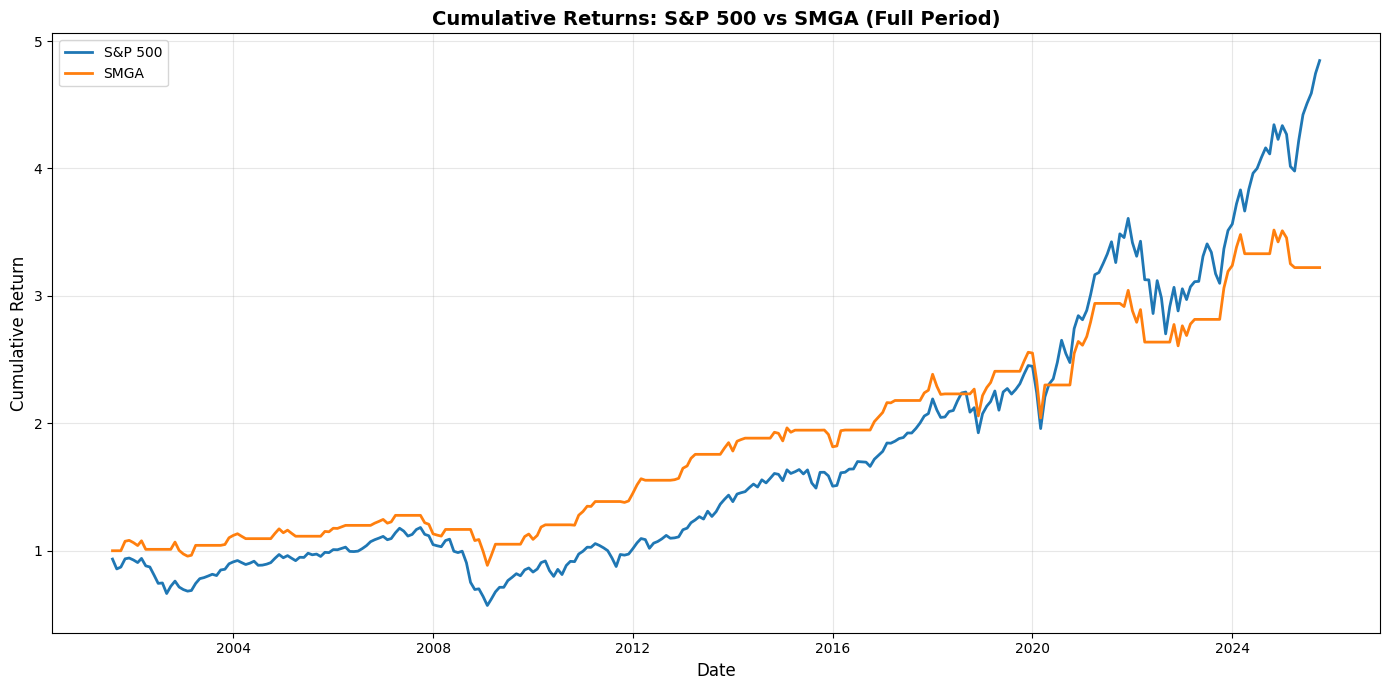

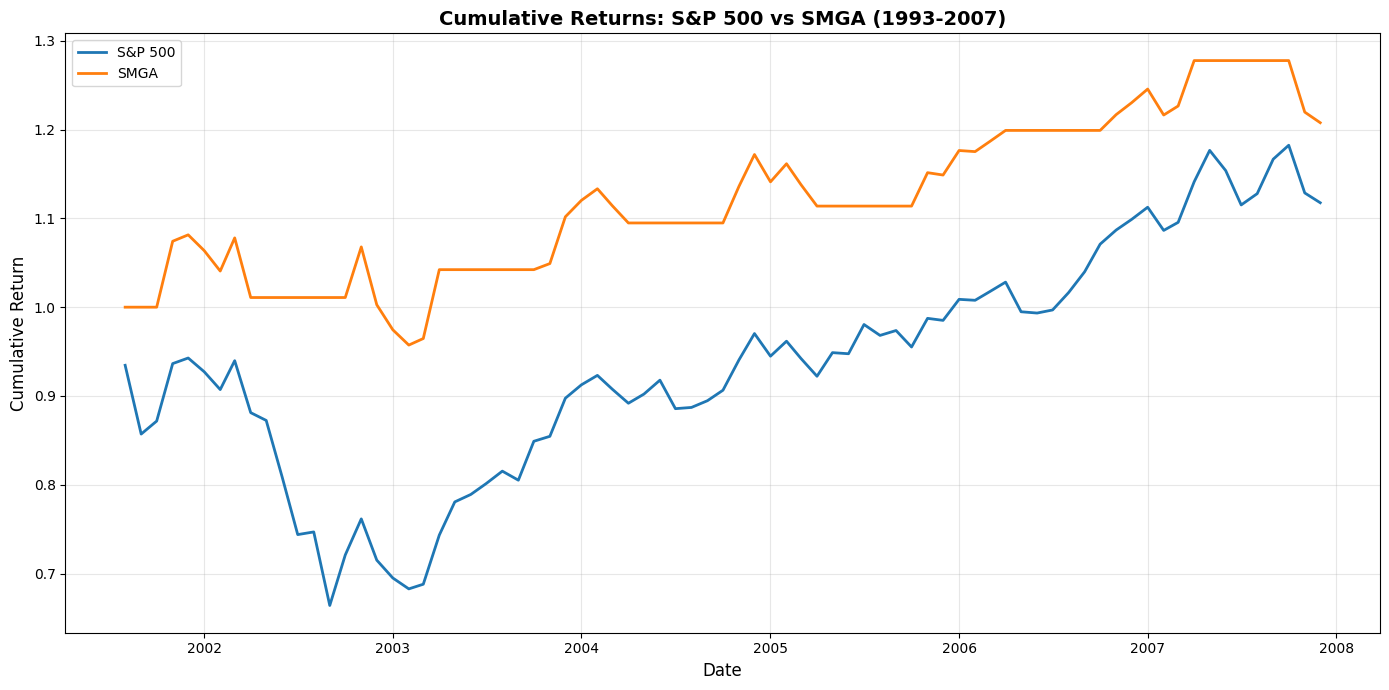

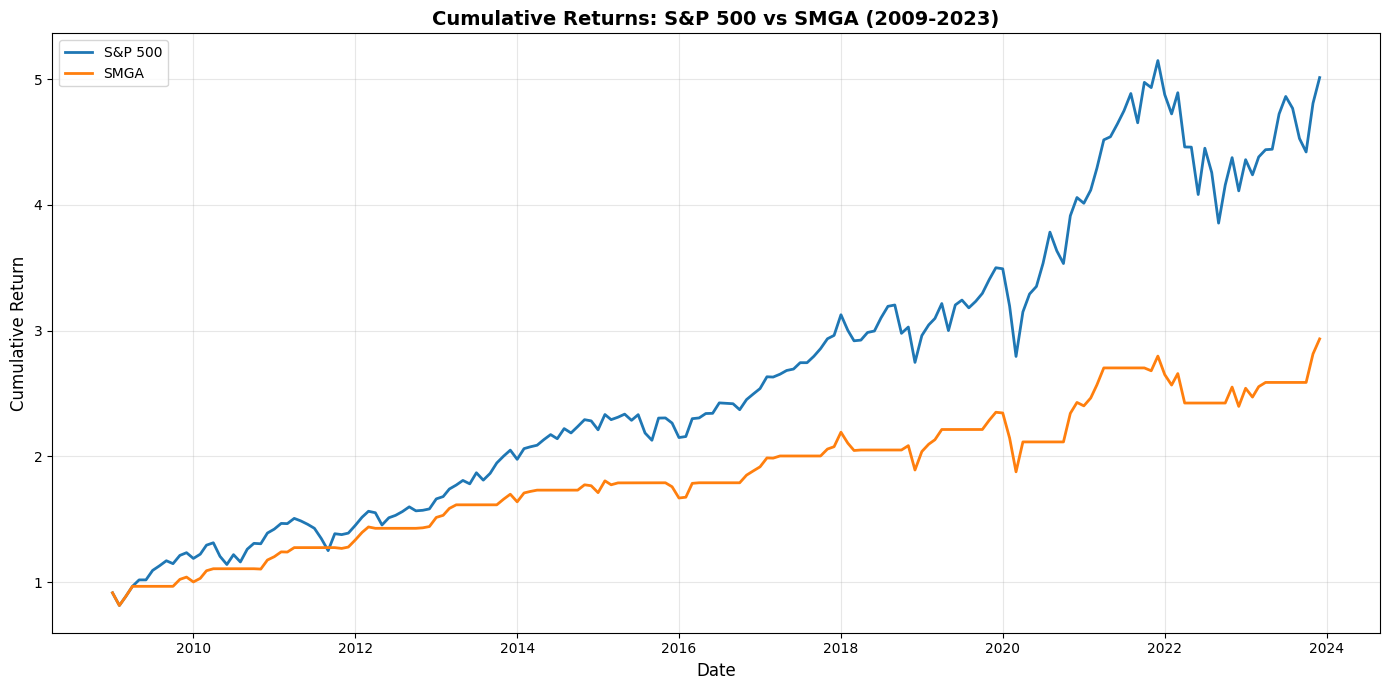

In [9]:
strategies_full = {
    'S&P 500': sp500_excess,
    'SMGA': smga_excess
}

plot_cumulative_returns(strategies_full, title="Cumulative Returns: S&P 500 vs SMGA (Full Period)")

# %%
# Cell 13: Plot cumulative returns - Period 1 (1993-2007)
strategies_p1 = {
    'S&P 500': sp500_p1,
    'SMGA': smga_p1
}

plot_cumulative_returns(strategies_p1, title="Cumulative Returns: S&P 500 vs SMGA (1993-2007)")

# %%
# Cell 14: Plot cumulative returns - Period 2 (2009-2023)
strategies_p2 = {
    'S&P 500': sp500_p2,
    'SMGA': smga_p2
}

plot_cumulative_returns(strategies_p2, title="Cumulative Returns: S&P 500 vs SMGA (2009-2023)")

## More plots

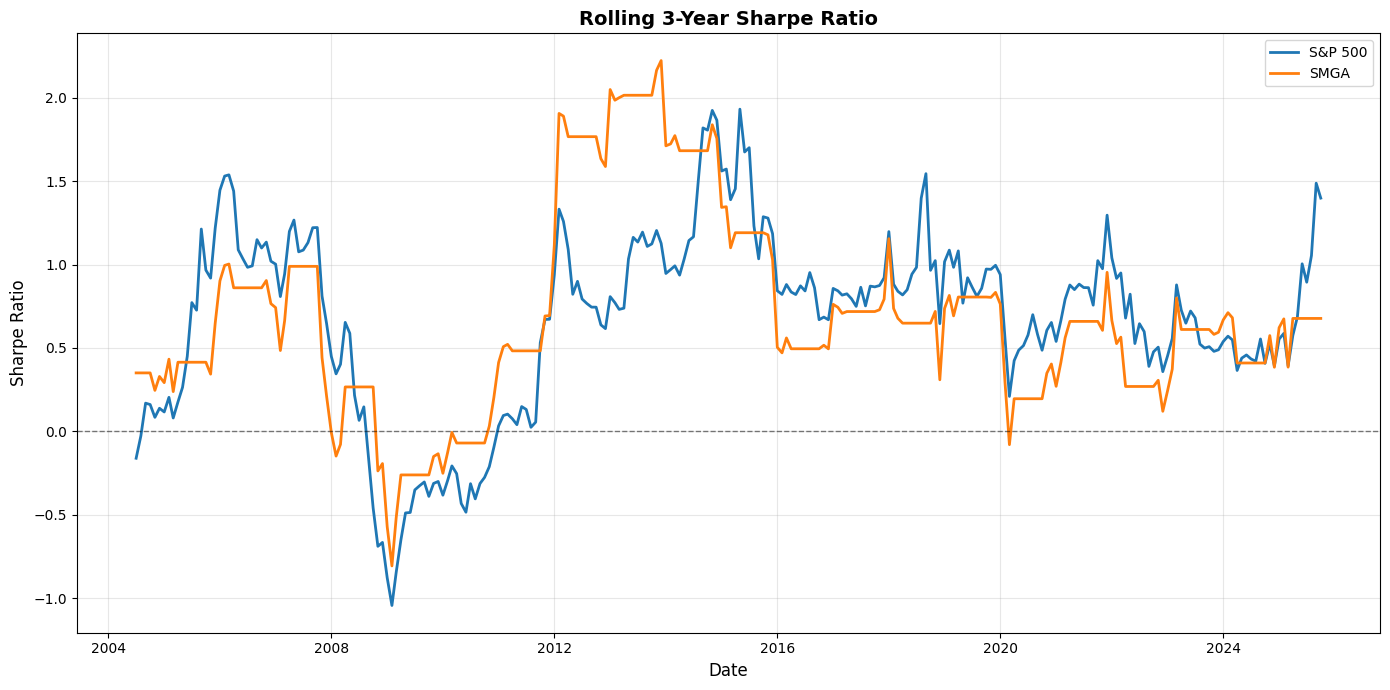

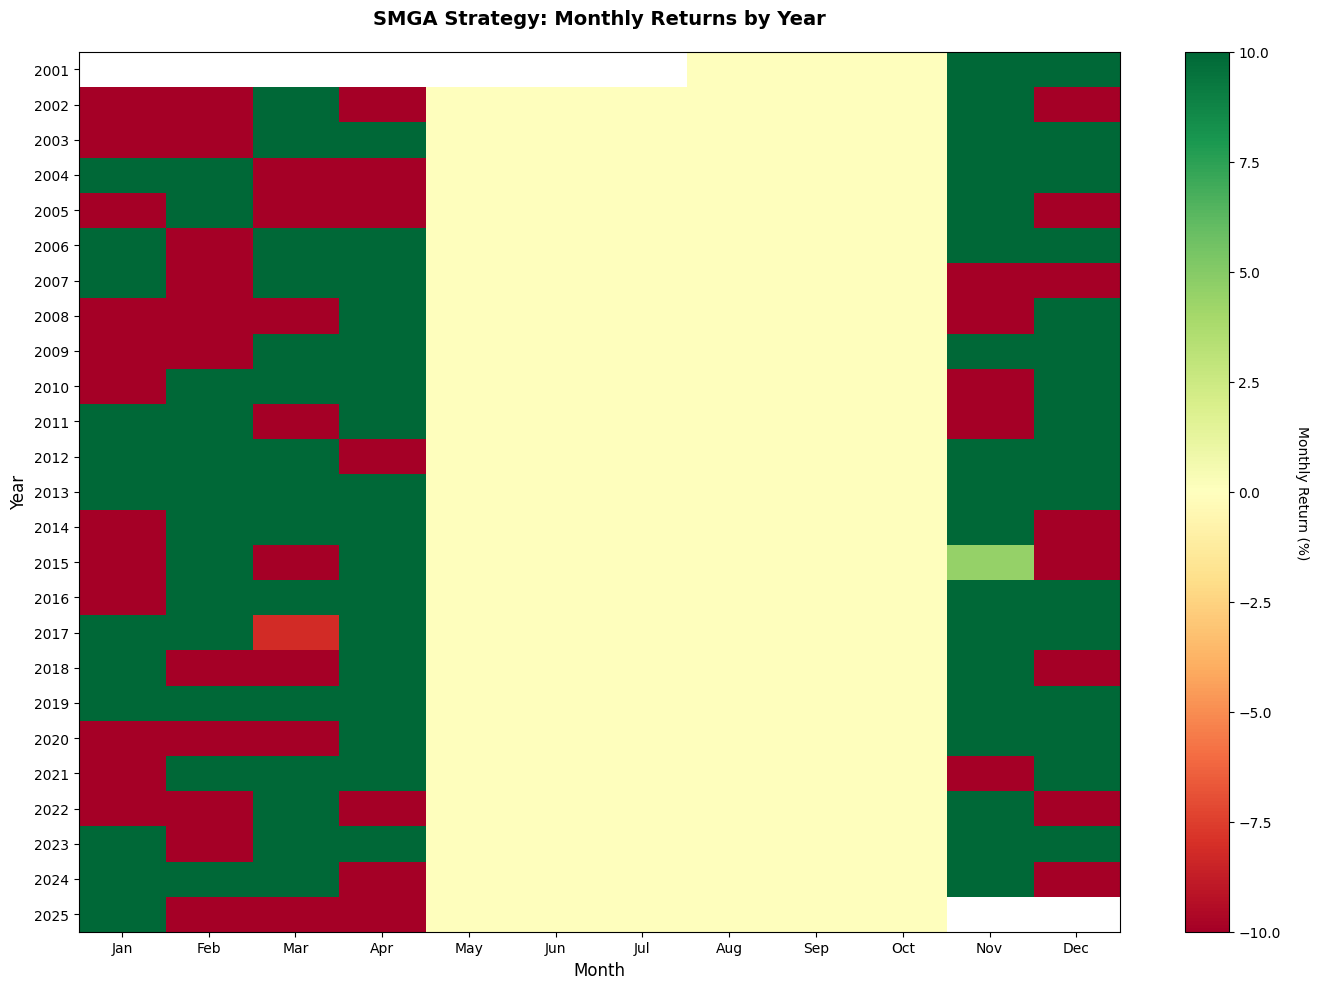

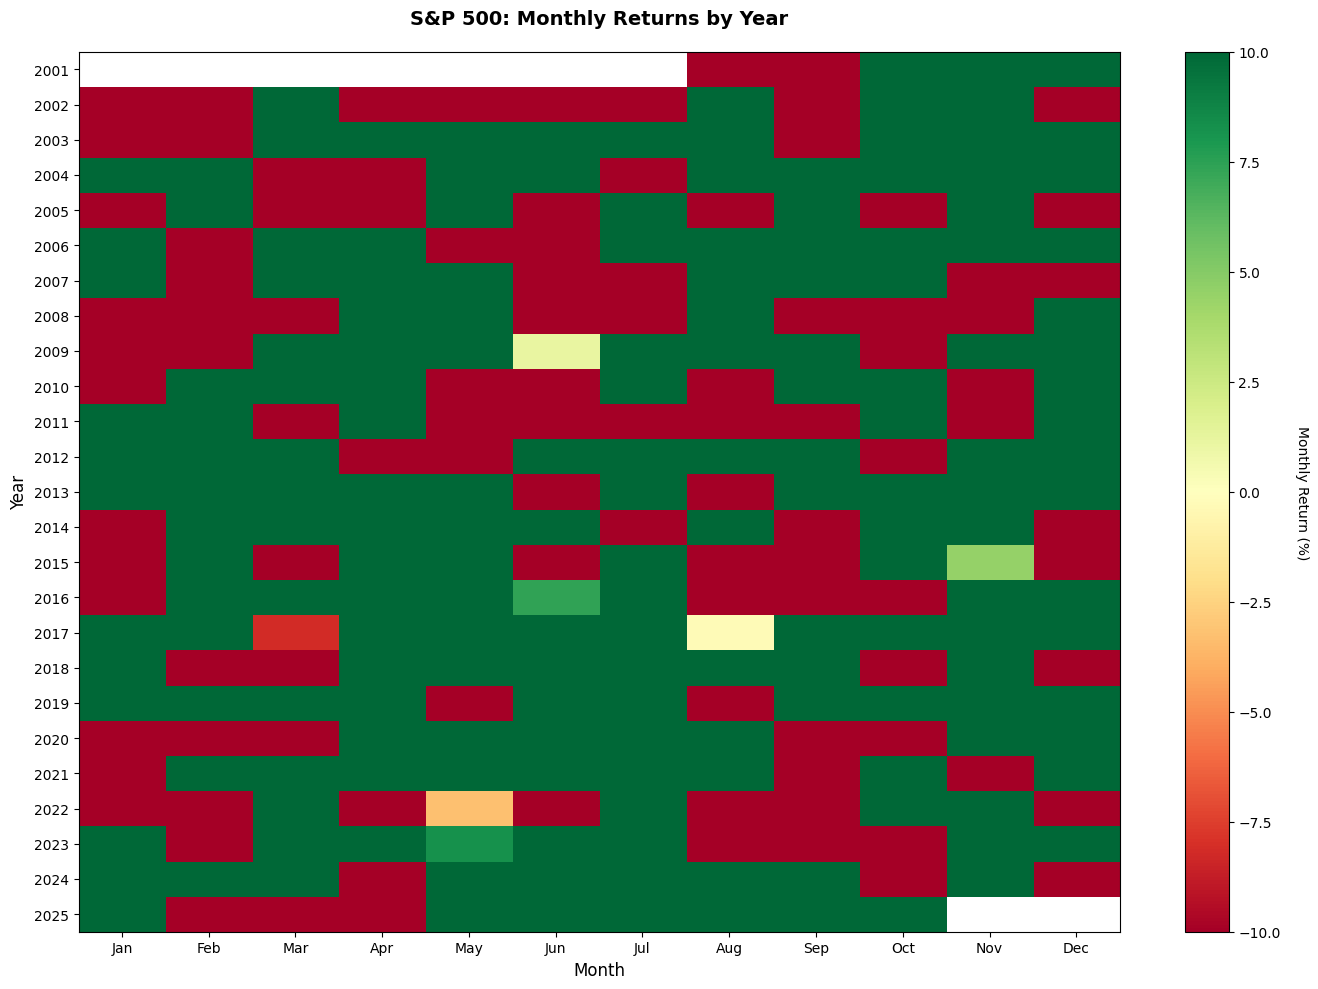

In [11]:
# Cell 15: Rolling 3-year Sharpe Ratio
plot_rolling_sharpe(strategies_full, window=36, title="Rolling 3-Year Sharpe Ratio")

# %%
# Cell 16: Monthly returns heatmap - SMGA strategy
plot_monthly_returns_heatmap(smga_excess, title="SMGA Strategy: Monthly Returns by Year")

# %%
# Cell 17: Monthly returns heatmap - S&P 500 baseline
sp500_excess
plot_monthly_returns_heatmap(sp500_excess, title="S&P 500: Monthly Returns by Year")

## Seasonal pattern anslysis

In [16]:
# Create month column for grouping
smga_by_month = smga_excess.to_frame('return')
smga_by_month['month'] = smga_by_month.index.month

sp500_by_month = sp500_excess.to_frame('return')
sp500_by_month['month'] = sp500_by_month.index.month

# Calculate average by month
smga_monthly_avg = smga_by_month.groupby('month')['return'].mean()
sp500_monthly_avg = sp500_by_month.groupby('month')['return'].mean()

seasonal_comparison = pd.DataFrame({
    'S&P 500': sp500_monthly_avg,
    'SMGA': smga_monthly_avg
})
seasonal_comparison.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("Average Monthly Returns (%) by Month:")
print(seasonal_comparison)

Average Monthly Returns (%) by Month:
    S&P 500   SMGA
Jan  -0.080 -0.080
Feb   0.009  0.009
Mar   0.950  0.950
Apr   1.434  1.434
May   0.724  0.000
Jun  -0.111  0.000
Jul   1.714  0.000
Aug  -0.146  0.000
Sep  -1.220  0.000
Oct   1.351  0.000
Nov   2.562  2.562
Dec   0.553  0.553


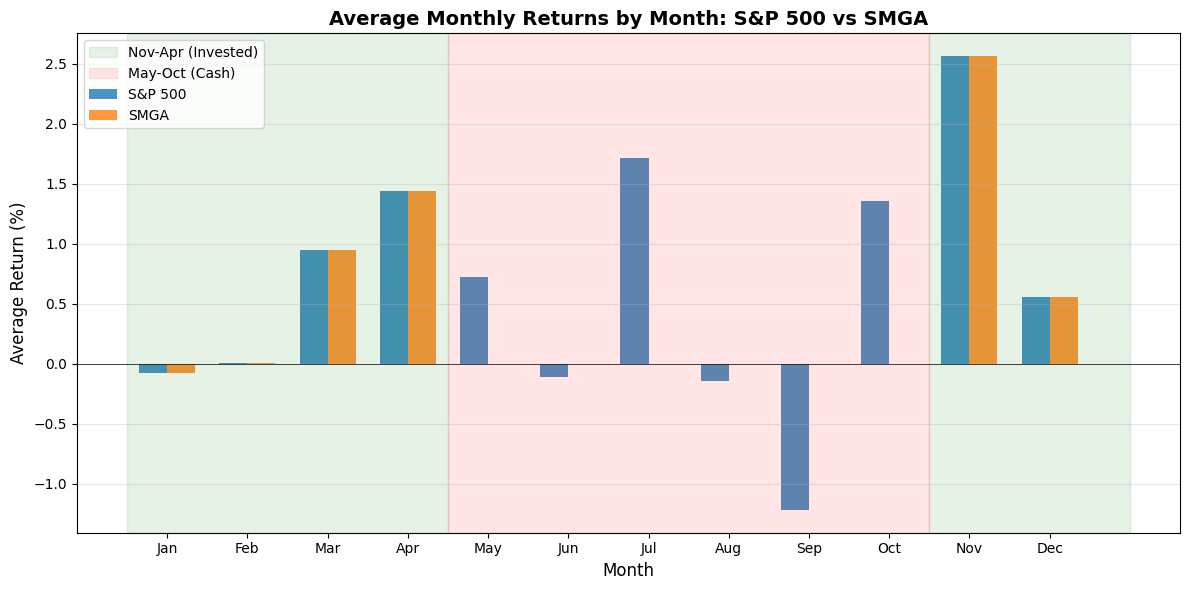

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(seasonal_comparison.index))
width = 0.35

ax.bar(x - width/2, seasonal_comparison['S&P 500'], width, label='S&P 500', alpha=0.8)
ax.bar(x + width/2, seasonal_comparison['SMGA'], width, label='SMGA', alpha=0.8)

# Highlight Nov-Apr period
ax.axvspan(9.5, 12, alpha=0.1, color='green', label='Nov-Apr (Invested)')
ax.axvspan(-0.5, 3.5, alpha=0.1, color='green')
ax.axvspan(3.5, 9.5, alpha=0.1, color='red', label='May-Oct (Cash)')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Return (%)', fontsize=12)
ax.set_title('Average Monthly Returns by Month: S&P 500 vs SMGA', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(seasonal_comparison.index)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()